In [7]:
import re
import os
from os import path
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [8]:
folder_type = "discrete"
filename= "bins10_epochs20_arch10,5,3_lr0.1.csv"
root_path = path.dirname(os.getcwd())
filepath = path.join(root_path, "results", folder_type, filename)

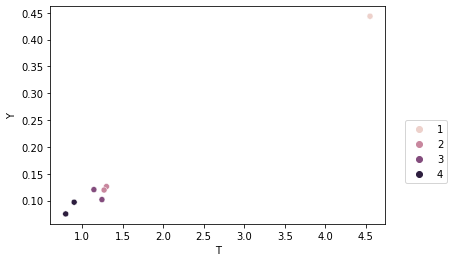

In [9]:
df = pd.read_csv(filepath)
_ = sns.scatterplot(data=df.query(f"epoch=={19}"), x="T", y="Y", hue="layer")

plt.legend(bbox_to_anchor=[1.2, 0.5])
plt.show()

In [10]:
match = re.search("epochs(\d+).*", filename)

epochs = int(match.group(1))

filename_no_ext = path.splitext(filename)[0]

save_path = path.join(root_path, "images", folder_type, filename_no_ext)

path_creater = Path(save_path)
path_creater.mkdir(parents=True, exist_ok=True)

In [11]:
for epoch in range(int(epochs)):
    _ = plt.figure()
    sns.scatterplot(data=df.query(f"epoch=={epoch}"), x="T", y="Y", hue="layer")
    plt.title(f"Época: {epoch}")
    plt.legend(bbox_to_anchor=[1.2, 0.5])
    plt.tight_layout()
    plt.savefig(path.join(save_path, f"{epoch}.png"), facecolor='w')
    plt.close()